import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor





Read csv 

In [2]:
# Read dataset
d = pd.read_csv('Consumptions.csv', sep=';')
d.shape
df = pd.DataFrame(d)


See the data

In [3]:
df

,CUPS,ZipCode,Rate,Date,Hour,Value
0,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,1,502
1,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,2,418
2,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,3,418
3,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,4,418
4,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,5,418
...,...,...,...,...,...,...
3591726,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,22,288
3591727,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,23,480
3591728,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,23,480
3591729,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,24,356


In [4]:
# we know that the outliers in the column 'Value' might possibly be caused 
# by the usage of big companies, even though we decidedto keep them so we didnt delete any important information.


#df[(np.abs(stats.zscore(df['Value'])) < 3)]

/var/folders/5n/j140xbc50gsc_tnmgktbj_gr0000gn/T/ipykernel_20095/2651653556.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['Value'])


<AxesSubplot:xlabel='Value', ylabel='Density'>

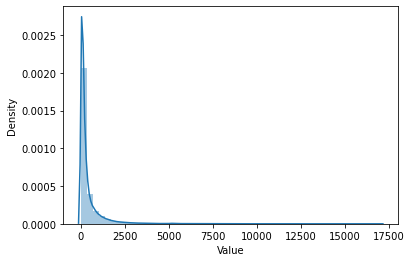

In [5]:
import seaborn as sns
d['Value'].describe()
sns.distplot(d['Value'])

/var/folders/5n/j140xbc50gsc_tnmgktbj_gr0000gn/T/ipykernel_20095/2336518021.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['Value'], fit=norm)


<AxesSubplot:xlabel='Value', ylabel='Density'>

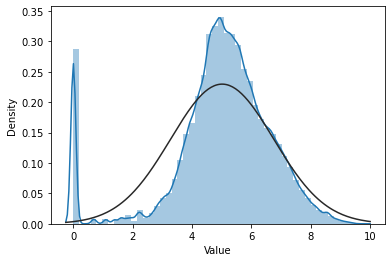

In [6]:
#we have a positive skew, we must fix it.
from scipy.stats import norm, skew
d['Value'] = np.log1p(d['Value'])
sns.distplot(d['Value'], fit=norm)

We created a csv to make our predictions better with external data that we will later add to our dataframe.

The dataset imported will be used for obtaining the average temperture per day in spain. 

In [7]:
# Read dataset
w = pd.read_csv('Weather.csv', sep=';')
dfw = pd.DataFrame(w)

See the data

In [8]:
dfw

,Date,Max_Temp,Avrg_Temp,Min_Temp,Max_Hum,Min_Hum
0,2016-06-01,79,64,48,76,21
1,2016-06-02,82,67,46,71,15
2,2016-06-03,86,71,55,77,18
3,2016-06-04,82,71,59,88,23
4,2016-06-05,84,71,54,94,19
...,...,...,...,...,...,...
390,2017-06-26,88,75,63,100,19
391,2017-06-27,84,74,61,77,26
392,2017-06-28,79,72,64,60,28
393,2017-06-29,75,66,57,52,20


Check columns list and missing values.
We see there are no missing values

In [9]:

df.isna().sum() #no missing values

CUPS       0
ZipCode    0
Rate       0
Date       0
Hour       0
Value      0
dtype: int64

In [10]:

#Check variable data types
df.dtypes

CUPS        object
ZipCode      int64
Rate        object
Date        object
Hour         int64
Value      float64
dtype: object

In [11]:
df.nunique() #get unique count for each variable 

CUPS        1110
ZipCode      548
Rate           5
Date         395
Hour          24
Value      11047
dtype: int64

We add three columns to our dataframe with the dates as Year, Month and Day because we are going to use these columns separately.

In [12]:
year = []
month = []
day = []


for row in df['Date']:
    date = row.split('-')
    year.append(date[0])
    month.append(date[1])
    day.append(date[2])


df['Year'] = year
df['Month'] = month
df['Day'] = day

df

,CUPS,ZipCode,Rate,Date,Hour,Value,Year,Month,Day
0,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,1,6.220590,2016,06,01
1,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,2,6.037871,2016,06,01
2,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,3,6.037871,2016,06,01
3,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,4,6.037871,2016,06,01
4,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,5,6.037871,2016,06,01
...,...,...,...,...,...,...,...,...,...
3591726,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,22,5.666427,2017,06,30
3591727,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,23,6.175867,2017,06,30
3591728,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,23,6.175867,2017,06,30
3591729,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,24,5.877736,2017,06,30


After visualizing the Zip Codes we noticed, only the two first number of the Zip Code gives information about the province they are linked to.
So we created a new column in our dataframe with only these two first numbers. 

In [13]:
df["ZipCode"].unique()

array([11403, 11402, 11500, 29600, 18300, 29692,  6008, 50009, 22700,
       50641, 50410, 50196,  8001,  8640,  8015,  8860, 17310,  8003,
        8021,  8203, 13200, 28004, 28015, 28002, 28045, 28008, 40191,
       40003, 26002, 28400, 28044, 28223, 46400, 48700, 30007, 28036,
       28006, 28010, 46007, 31006,  3700, 26140, 28260, 30850,  6468,
       26003, 28047, 28003, 30360, 28020, 46730, 28109, 28025, 28009,
       42190,  3599, 30380,  5003, 28938,  3724, 46470, 48940, 23423,
        3770, 30740, 28224,  3013, 28039, 16002, 16004, 39750, 28250,
       15705, 46988, 46460, 28016, 28035,  8035, 41001, 28660, 11393,
       15895,  8029,  3195, 28760, 28040,  3726, 18800, 18006,  8017,
       28029, 46008, 28017,  3720, 11310,  8007, 46023, 24700, 30110,
       46701,  3710,  3600, 37006, 46702, 29004, 45590, 18005, 28911,
        3185, 28490,  3610,  3670, 30010, 12594, 30300, 14011, 41120,
       28222,  8014, 28529, 45215,  5560, 28903, 29651, 30203, 28019,
       19171, 28411,

In [14]:
zip_list = []

for zipcode in df['ZipCode']:
    zipcode = str(zipcode)
    if len(zipcode) < 5:
        new_zipcode = zipcode[:1]

    elif len(zipcode) == 5:
        
        new_zipcode = zipcode[:2]
    
    zip_list.append(int(new_zipcode))


zip_list

df["FirstNr_Zipcode"] = zip_list

df["FirstNr_Zipcode"] = df["FirstNr_Zipcode"]
df["FirstNr_Zipcode"].unique()

array([11, 29, 18,  6, 50, 22,  8, 17, 13, 28, 40, 26, 46, 48, 30, 31,  3,
       42,  5, 23, 16, 39, 15, 41, 24, 37, 45, 12, 14, 19,  2,  1, 21, 25,
       49,  4, 43, 47, 33, 34, 10, 27, 20, 36, 44,  9, 35,  7, 38])

We then, grouped the different Zip Codes associated to the different Provinces to different kinds of climate zones.

In [15]:
regions = { 1: [5, 40, 44,17,25,22,31,24,42,34,26,1,9], #Mountain
            2: [20, 48,39, 33,27,15,36,32], # Oceanic
            3: [21,41,14,11,29,18,23,4,30,3,46,12,43,8,38,35,51,52,7], #mediterainian
            4: [6,13, 2,10,45,16,37,49,47,19,28,50], #continental
} 

climate_zones = []

for zip in df['FirstNr_Zipcode']:
    for key in regions:
        if zip in regions[key]:
            climate_zones.append(key)
            break
        
df['Climate_Zone'] = climate_zones

df['Climate_Zone'].unique()

array([3, 4, 1, 2])

Here we see that different months are linked to different seasons of the year, which have different climat. We added a column to our main dataframe with a number for each four seasons of the year, associated to the month.

In [16]:
seasonability = { 1: ['03','04','05'], 2: ['06', '07', '08'], 3: ['09', '10', '11'], 4: ['12', '01', '02'],} 
season = []

for month in df['Month']:
    for key in seasonability:
        if month in seasonability[key]:
            season.append(key)
            break

df['Season'] = season
df['Season'].unique()


array([2, 3, 4, 1])

Depending on the hour, the consumptions varies. We created a new column for our dataframe with a number from 1 to 4 where we grouped the diferent hours of the day into : morning, afternoon, evening, night. 

In [17]:
Time_of_day = { 1: [6,7,8,9,10,11], #morning
            2: [12, 13, 14,15,16,17], # afternoon
            3: [18, 19,20,21,22,23], # evening
            4: [24, 1, 2,3,4,5], #night
} 

daytime = []

for time in df['Hour']:
    for key in Time_of_day:
        if time in Time_of_day[key]:
            daytime.append(key)
            break


df['Daytime'] = daytime


We decided to create a column with the population for each province of spain to see if it has an impact on its customer population. Maybe more or less densed populated areas have a different energy consumption.

In [18]:
population = {  10681: [1],
                371248: [2],
                188270:	[3],
                1945642:	[4],
                142183:	[5],
                168955:	[6],
                955050:	[7],
                524962:	[8],
                410275:	[9],
                1138161:	[10],
                5540925:	[11],
                1652999:	[12],
                168825:	[13],
                93291:	[14],
                83679:	[15],
                161702:	[16],
                664916:	[17],
                2566474:	[18],
                257723:	[19],
                226329:	[20],
                520668:	[21],
                1156447:	[22],
                699329:	[23],
                1111674:	[24],
                346005:	[25],
                345548:	[26],
                211899:	[27],
                802422:	[28],
                978638:	[29],
                919319:	[30],
                440915:	[31],
                1472049:	[32],
                644447:	[33],
                601699:	[34],
                400007:	[35],
                1238492:	[36],
                326724:	[37],
                1942115:	[38],
                1014829:	[39],
                6495551:	[40],
                321417:	[41],
                489752:	[42],
                322027:	[43],
                713818:	[44],
                84180:	[45],
                591888:	[46],
                693729:	[47],
                810178:	[48],
                532284:	[49],
                706407:	[50],
                761632:	[51],
                1103850:	[52]

} 

province_population = []

for zip in df['FirstNr_Zipcode']:
    for key in population:
        if zip in population[key]:
            province_population.append(key)
            break
        
df['Population'] = province_population

df['Population'].unique()

array([5540925,  978638, 2566474,  168955,  706407, 1156447,  524962,
        664916,  168825,  802422, 6495551,  345548,  591888,  810178,
        919319,  440915,  188270,  489752,  142183,  699329,  161702,
       1014829,   83679,  321417, 1111674,  326724,   84180, 1652999,
         93291,  257723,  371248,   10681,  520668,  346005,  532284,
       1945642,  322027,  693729,  644447,  601699, 1138161,  211899,
        226329, 1238492,  713818,  410275,  400007,  955050, 1942115])

The rate type depends on the capacity used by a user. For this, we decided o create a new column, grouping the user who had the same amount of capacity.

In [19]:
df['Rate'].unique()

array(['2.0A', '2.0DHA', '2.1A', '2.1DHA', '3.0A'], dtype=object)

In [20]:
rates = { 1: ['2.0A','2.0DHA'],
          2: ['2.1A', '2.1DHA'],
          3: ['3.0A'],
} 

user_types = []

for entry in df['Rate']:
    for newKey in rates:
        if entry in rates[newKey]:
            user_types.append(newKey)
            
        

        

df['User_Types']= user_types


df['User_Types'].unique()





array([1, 2, 3])

Let's do some data analysis and understand the data


<AxesSubplot:>

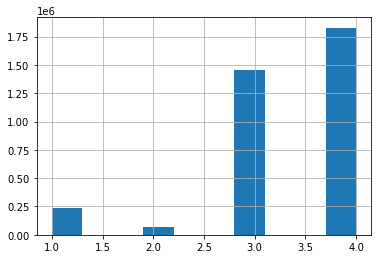

In [21]:

df['Climate_Zone'].hist()

<AxesSubplot:>

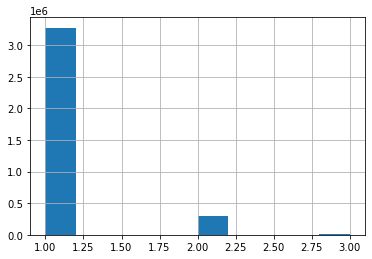

In [22]:
d['User_Types'].hist()

<AxesSubplot:>

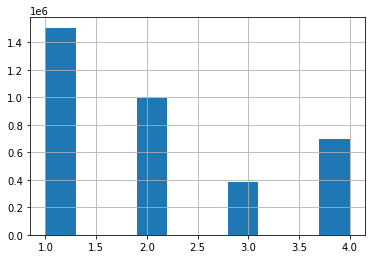

In [23]:
d['Season'].hist()

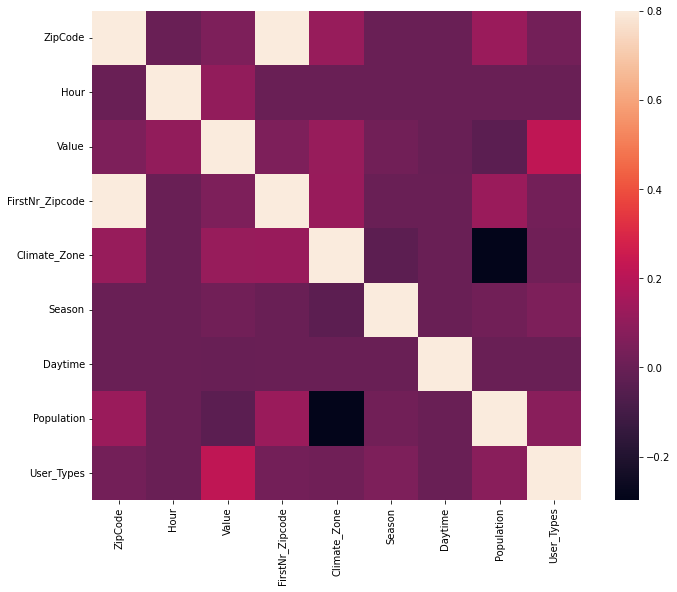

In [24]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Let's visualize what we have now in our dataframe

In [25]:
df

,CUPS,ZipCode,Rate,Date,Hour,Value,Year,Month,Day,FirstNr_Zipcode,Climate_Zone,Season,Daytime,Population,User_Types
0,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,1,6.220590,2016,06,01,11,3,2,4,5540925,1
1,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,2,6.037871,2016,06,01,11,3,2,4,5540925,1
2,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,3,6.037871,2016,06,01,11,3,2,4,5540925,1
3,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,4,6.037871,2016,06,01,11,3,2,4,5540925,1
4,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,5,6.037871,2016,06,01,11,3,2,4,5540925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591726,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,22,5.666427,2017,06,30,39,2,2,3,1014829,1
3591727,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,23,6.175867,2017,06,30,39,2,2,3,1014829,1
3591728,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,23,6.175867,2017,06,30,39,2,2,3,1014829,1
3591729,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,24,5.877736,2017,06,30,39,2,2,4,1014829,1


We drop Rate since now we have User_Types to represent the different type ofcapacity used by consumers.

In [26]:
df.drop(['Rate'], axis=1, inplace=True)

In [27]:
df['Month'] = df['Month'].astype(int)

In [28]:
df['Day'] = df['Day'].astype(int)

In [29]:
df['Year'] = df['Year'].astype(int)

In [30]:
df.dtypes

CUPS                object
ZipCode              int64
Date                object
Hour                 int64
Value              float64
Year                 int64
Month                int64
Day                  int64
FirstNr_Zipcode      int64
Climate_Zone         int64
Season               int64
Daytime              int64
Population           int64
User_Types           int64
dtype: object

Since we want to predict the consumption per day per hout, we created a new dataframe to sum all the consumptions for all hours in all the dates.

In [31]:
df2 =df.groupby(['Date', 'Hour']).sum().Value

df2
    

Date        Hour
2016-06-01  1        598.451588
            2        565.653148
            3        555.369831
            4        554.556967
            5        539.669298
                       ...     
2017-06-30  20      5394.315878
            21      5390.058928
            22      5495.883936
            23      5548.978019
            24      5482.200405
Name: Value, Length: 9479, dtype: float64

We drop from our inicial dataframe Date, Hour and Value since they are added up for all customers (they are putted for each customer). Now we have the consumption for all spain per hour that will later add to our final dataframe.

In [32]:
df = df.drop_duplicates(subset=['Date', 'Hour'], keep='first')
df

,CUPS,ZipCode,Date,Hour,Value,Year,Month,Day,FirstNr_Zipcode,Climate_Zone,Season,Daytime,Population,User_Types
0,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,1,6.220590,2016,6,1,11,3,2,4,5540925,1
1,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,2,6.037871,2016,6,1,11,3,2,4,5540925,1
2,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,3,6.037871,2016,6,1,11,3,2,4,5540925,1
3,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,4,6.037871,2016,6,1,11,3,2,4,5540925,1
4,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,5,6.037871,2016,6,1,11,3,2,4,5540925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566347,975AFA49D54C1E63D2904D9412FF93B7,14300,2017-06-30,12,5.141664,2017,6,30,14,3,2,2,93291,1
3566348,975AFA49D54C1E63D2904D9412FF93B7,14300,2017-06-30,21,5.726848,2017,6,30,14,3,2,3,93291,1
3566349,975AFA49D54C1E63D2904D9412FF93B7,14300,2017-06-30,1,5.442418,2017,6,30,14,3,2,4,93291,1
3566350,975AFA49D54C1E63D2904D9412FF93B7,14300,2017-06-30,24,3.891820,2017,6,30,14,3,2,4,93291,1


In [33]:
df.drop("Value", axis=1, inplace=True)
df

/var/folders/5n/j140xbc50gsc_tnmgktbj_gr0000gn/T/ipykernel_20095/2469789503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Value", axis=1, inplace=True)


,CUPS,ZipCode,Date,Hour,Year,Month,Day,FirstNr_Zipcode,Climate_Zone,Season,Daytime,Population,User_Types
0,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,1,2016,6,1,11,3,2,4,5540925,1
1,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,2,2016,6,1,11,3,2,4,5540925,1
2,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,3,2016,6,1,11,3,2,4,5540925,1
3,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,4,2016,6,1,11,3,2,4,5540925,1
4,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,5,2016,6,1,11,3,2,4,5540925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566347,975AFA49D54C1E63D2904D9412FF93B7,14300,2017-06-30,12,2017,6,30,14,3,2,2,93291,1
3566348,975AFA49D54C1E63D2904D9412FF93B7,14300,2017-06-30,21,2017,6,30,14,3,2,3,93291,1
3566349,975AFA49D54C1E63D2904D9412FF93B7,14300,2017-06-30,1,2017,6,30,14,3,2,4,93291,1
3566350,975AFA49D54C1E63D2904D9412FF93B7,14300,2017-06-30,24,2017,6,30,14,3,2,4,93291,1


We are now going to put the initial dataframe with the one created with the added values of consumption per hour. Now, the consumption will not be asociated to the consumer.

In [34]:
df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [35]:
df3 = pd.concat([df, df2], axis=1)
df3

,CUPS,ZipCode,Date,Hour,Year,Month,Day,FirstNr_Zipcode,Climate_Zone,Season,Daytime,Population,User_Types,Value
0,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,1,2016,6,1,11,3,2,4,5540925,1,598.451588
1,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,2,2016,6,1,11,3,2,4,5540925,1,565.653148
2,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,3,2016,6,1,11,3,2,4,5540925,1,555.369831
3,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,4,2016,6,1,11,3,2,4,5540925,1,554.556967
4,F0216555032235ABF9A1515F221C3F7F,11403,2016-06-01,5,2016,6,1,11,3,2,4,5540925,1,539.669298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9474,975AFA49D54C1E63D2904D9412FF93B7,14300,2017-06-30,12,2017,6,30,14,3,2,2,93291,1,5394.315878
9475,975AFA49D54C1E63D2904D9412FF93B7,14300,2017-06-30,21,2017,6,30,14,3,2,3,93291,1,5390.058928
9476,975AFA49D54C1E63D2904D9412FF93B7,14300,2017-06-30,1,2017,6,30,14,3,2,4,93291,1,5495.883936
9477,975AFA49D54C1E63D2904D9412FF93B7,14300,2017-06-30,24,2017,6,30,14,3,2,4,93291,1,5548.978019


And at last, we are going to merge our final dataframe with the extra dataset imported with the average temperture, max and min temperature and the max and min humidity. 

In [36]:
dfw.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)

In [37]:
final=df3.merge(dfw, on = "Date", how="left")

In [38]:
date_list = final['Date'] 


We will now drop Date, CUPS and ZipCode

In [39]:
final.drop(['Date', "CUPS", 'ZipCode'], axis=1, inplace=True)

And visualize our final dataframe

In [40]:
final

,Hour,Year,Month,Day,FirstNr_Zipcode,Climate_Zone,Season,Daytime,Population,User_Types,Value,Max_Temp,Avrg_Temp,Min_Temp,Max_Hum,Min_Hum
0,1,2016,6,1,11,3,2,4,5540925,1,598.451588,79,64,48,76,21
1,2,2016,6,1,11,3,2,4,5540925,1,565.653148,79,64,48,76,21
2,3,2016,6,1,11,3,2,4,5540925,1,555.369831,79,64,48,76,21
3,4,2016,6,1,11,3,2,4,5540925,1,554.556967,79,64,48,76,21
4,5,2016,6,1,11,3,2,4,5540925,1,539.669298,79,64,48,76,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9474,12,2017,6,30,14,3,2,2,93291,1,5394.315878,73,65,52,62,27
9475,21,2017,6,30,14,3,2,3,93291,1,5390.058928,73,65,52,62,27
9476,1,2017,6,30,14,3,2,4,93291,1,5495.883936,73,65,52,62,27
9477,24,2017,6,30,14,3,2,4,93291,1,5548.978019,73,65,52,62,27


In [41]:
final.drop(['FirstNr_Zipcode', "Climate_Zone", 'Population','User_Types','Max_Hum', 'Min_Hum'], axis=1, inplace=True)

In [42]:
final

,Hour,Year,Month,Day,Season,Daytime,Value,Max_Temp,Avrg_Temp,Min_Temp
0,1,2016,6,1,2,4,598.451588,79,64,48
1,2,2016,6,1,2,4,565.653148,79,64,48
2,3,2016,6,1,2,4,555.369831,79,64,48
3,4,2016,6,1,2,4,554.556967,79,64,48
4,5,2016,6,1,2,4,539.669298,79,64,48
...,...,...,...,...,...,...,...,...,...,...
9474,12,2017,6,30,2,2,5394.315878,73,65,52
9475,21,2017,6,30,2,3,5390.058928,73,65,52
9476,1,2017,6,30,2,4,5495.883936,73,65,52
9477,24,2017,6,30,2,4,5548.978019,73,65,52


In [43]:
# Read dataset
d = pd.read_csv('Futuredata.csv', sep=';')
d.shape
pred = pd.DataFrame(d)
pred

,Hour,Year,Month,Day,Season,Daytime,Value,Max_Temp,Avrg_Temp,Min_Temp
0,1,2017,8,1,2,4,NaN,91,81,68
1,2,2017,8,1,2,4,NaN,91,81,68
2,3,2017,8,1,2,4,NaN,91,81,68
3,4,2017,8,1,2,4,NaN,91,81,68
4,5,2017,8,1,2,4,NaN,91,81,68
...,...,...,...,...,...,...,...,...,...,...
2227,20,2017,11,1,3,3,NaN,68,55,46
2228,21,2017,11,1,3,3,NaN,68,55,46
2229,22,2017,11,1,3,3,NaN,68,55,46
2230,23,2017,11,1,3,3,NaN,68,55,46


In [44]:
pred.drop(['Value'], axis=1, inplace=True)

In [45]:

X = final.copy()
y = final['Value'] 
X = final.drop(['Value'], axis=1) 



model = Ridge(alpha=0.1)
model.fit(X, y)



Ridge(alpha=0.1)

In [46]:

y_pred = model.predict(pred)

pred['Value'] = y_pred
pred

,Hour,Year,Month,Day,Season,Daytime,Max_Temp,Avrg_Temp,Min_Temp,Value
0,1,2017,8,1,2,4,91,81,68,4870.900033
1,2,2017,8,1,2,4,91,81,68,4875.881116
2,3,2017,8,1,2,4,91,81,68,4880.862199
3,4,2017,8,1,2,4,91,81,68,4885.843282
4,5,2017,8,1,2,4,91,81,68,4890.824365
...,...,...,...,...,...,...,...,...,...,...
2227,20,2017,11,1,3,3,68,55,46,5113.629222
2228,21,2017,11,1,3,3,68,55,46,5118.610305
2229,22,2017,11,1,3,3,68,55,46,5123.591388
2230,23,2017,11,1,3,3,68,55,46,5128.572471


In [47]:
pred.drop(['Daytime', "Season", 'Max_Temp', 'Avrg_Temp', 'Min_Temp', 'Year'], axis=1, inplace=True)

In [48]:


pred['Date'] = pd.to_datetime(dict(year = "2017", month=pred.Month, day=pred.Day))
pred


,Hour,Month,Day,Value,Date
0,1,8,1,4870.900033,2017-08-01
1,2,8,1,4875.881116,2017-08-01
2,3,8,1,4880.862199,2017-08-01
3,4,8,1,4885.843282,2017-08-01
4,5,8,1,4890.824365,2017-08-01
...,...,...,...,...,...
2227,20,11,1,5113.629222,2017-11-01
2228,21,11,1,5118.610305,2017-11-01
2229,22,11,1,5123.591388,2017-11-01
2230,23,11,1,5128.572471,2017-11-01


In [49]:
pred.drop(['Month', 'Day'], axis=1, inplace=True)
pred

,Hour,Value,Date
0,1,4870.900033,2017-08-01
1,2,4875.881116,2017-08-01
2,3,4880.862199,2017-08-01
3,4,4885.843282,2017-08-01
4,5,4890.824365,2017-08-01
...,...,...,...
2227,20,5113.629222,2017-11-01
2228,21,5118.610305,2017-11-01
2229,22,5123.591388,2017-11-01
2230,23,5128.572471,2017-11-01


In [50]:
pred = pred[['Date', 'Hour', 'Value']]


In [51]:
pred = pred.rename(columns={'Value':'Consumption'})


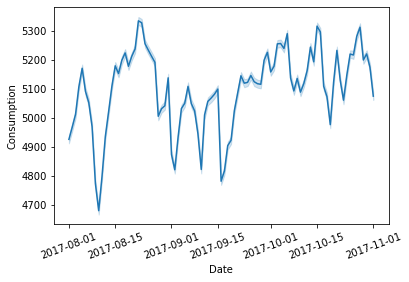

In [52]:
sns.lineplot(x = 'Date', y = 'Consumption', data = pred)
plt.xticks(rotation = 20)
plt.show()

In [53]:
pred.to_csv('submission.csv', index=False)